In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# for image, label in trainloader:
    ## do things with images and labels

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


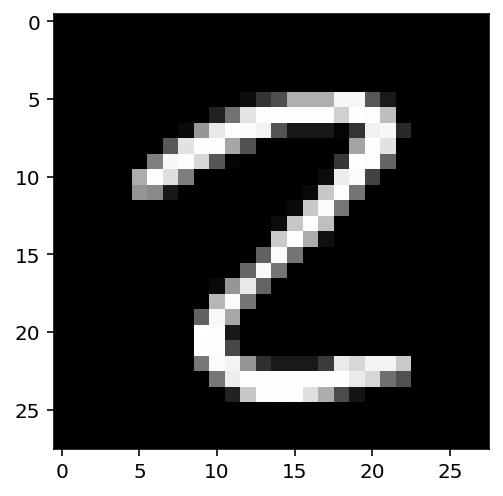

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [5]:
## Your solution
def activation(x):
    return 1/(1+torch.exp(-x))


inputs = images.view(images.shape[0], -1) # Could have put 784, -1 automatically flattens

# Make random weights with normal distrobution
W1 = torch.randn(784, 256)
B1 = torch.randn(256)

# W2 => out out is 10 numbers
W2 = torch.randn(256, 10)
B2 = torch.randn(10)

hidden = activation(torch.mm(inputs, W1) + B1)

out = torch.mm(hidden, W2) + B2 # output of your network, should have shape (64,10)

In [6]:
# Softmax gives us probabilities over all 10 numbers
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [7]:
#  nn makes all this much simpler
from torch import nn

In [8]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [9]:
# Functional Version
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        
        return x


In [11]:
model = Network()
model

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0181,  0.0198,  0.0032,  ..., -0.0228,  0.0265, -0.0053],
        [-0.0197,  0.0055,  0.0299,  ...,  0.0305,  0.0107,  0.0104],
        [-0.0209, -0.0339,  0.0030,  ..., -0.0060, -0.0250, -0.0302],
        ...,
        [ 0.0249, -0.0303, -0.0300,  ...,  0.0065, -0.0214, -0.0335],
        [ 0.0001, -0.0242, -0.0352,  ...,  0.0038,  0.0101, -0.0065],
        [ 0.0106,  0.0314, -0.0160,  ..., -0.0348, -0.0040,  0.0109]],
       requires_grad=True)
Parameter containing:
tensor([-0.0172, -0.0103, -0.0251, -0.0137, -0.0023, -0.0101,  0.0155, -0.0151,
        -0.0026,  0.0086,  0.0192,  0.0112,  0.0279,  0.0153, -0.0070, -0.0288,
        -0.0029,  0.0310, -0.0296,  0.0160,  0.0352, -0.0171,  0.0278,  0.0188,
         0.0059, -0.0281, -0.0181, -0.0173,  0.0073,  0.0310,  0.0110,  0.0038,
        -0.0278,  0.0309, -0.0268,  0.0320, -0.0033,  0.0335,  0.0154, -0.0274,
        -0.0242,  0.0066, -0.0099, -0.0027, -0.0335, -0.0012,  0.0054, -0.0207,
         0.0198

In [12]:
# forward pass
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])


In [13]:
#  nn.Sequential

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [14]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3088, grad_fn=<NllLossBackward>)
